In [72]:
import scipy.io as sci
from scipy.signal import medfilt
from scipy import ndimage

import h5py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
mat = sci.loadmat('preds01.mat')
skeleton = sci.loadmat('skeleton[current].mat')
f = h5py.File('alignedh5s/01.h5', 'r')

def plot_connections(xpos, ypos, ax,num_points = 25):
    ax.xlim(0,148)
    ax.ylim(148,0)
    [ax.plot([xpos[c[0]],xpos[c[1]]],[ypos[c[0]],ypos[c[1]]], linewidth=1) for c in connections[:num_points]];
    
preds = mat['preds'][0,0][2]
box = f['box'][:,0,:,:]
connections = skeleton['edges'] - 1

In [ ]:
#Functions
def degree_calc(x1,y1, x2,y2, x3,y3):
    x12 = x1-x2
    y12 = y1-y2
    d12 = np.sqrt(x12**2+y12**2)
    
    x23 = x3-x2
    y23 = y3-y2
    d23 = np.sqrt(x23**2+y23**2)
    
    cos_ang = (x12*x23 + y12*y23) / (d12*d23)
    angs = np.arccos(cos_ang)
    return np.degrees(angs)
def animate(i):
    ax.cla()
    ax.set_xlim(0,148)
    ax.set_ylim(148,0)
    
    xpos = preds[:, 0, i]
    ypos = preds[:, 1, i]
    [ax.plot([xpos[c[0]],xpos[c[1]]],[ypos[c[0]],ypos[c[1]]], linewidth=1) for c in connections[:25]];
    ax.scatter(xpos, ypos, s=5)
    
    frame = box[i,:,:]
    rotated = ndimage.rotate(frame, 270)
    img = np.fliplr(rotated)
    ax.imshow(img)
    ax.annotate(str(round(degrees_j5[i],2))+'°', (xpos[5], ypos[5]))
    ax.annotate(str(round(degrees_j9[i],2))+'°', (xpos[9],ypos[9]))
    ax.annotate(str(round(degrees_j14[i],2))+'°', (xpos[14],ypos[14]))
    ax.annotate(str(round(degrees_j17[i],2))+'°', (xpos[17],ypos[17]))
    ax.annotate(str(round(degrees_j21[i],2))+'°', (xpos[21],ypos[21]))
    ax.annotate(str(round(degrees_j26[i],2))+'°', (xpos[26],ypos[26]))

<IPython.core.display.Javascript object>


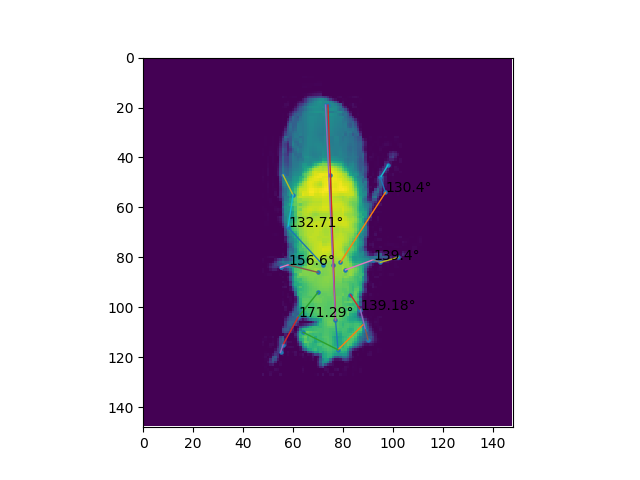

In [316]:
''' 
This is weird. Idk why, but in order to see the animation you need to run the block with plt.figure() and 
then remove it and it will work... not sure why that is. Apparently the error is lacking a 'canvas' to 
paint the figure over
'''

#Uncomment below line to see animation
%matplotlib notebook

fig, ax = plt.subplots()

def animate(i):
    ax.cla()
    ax.set_xlim(0,148)
    ax.set_ylim(148,0)
    
    xpos = preds[:, 0, i]
    ypos = preds[:, 1, i]
    [ax.plot([xpos[c[0]],xpos[c[1]]],[ypos[c[0]],ypos[c[1]]], linewidth=1) for c in connections[:25]];
    ax.scatter(xpos, ypos, s=5)
    
    frame = box[i,:,:]
    rotated = ndimage.rotate(frame, 270)
    img = np.fliplr(rotated)
    ax.imshow(img)
    ax.annotate(str(round(degrees_j5[i],2))+'°', (xpos[5], ypos[5]))
    ax.annotate(str(round(degrees_j9[i],2))+'°', (xpos[9],ypos[9]))
    ax.annotate(str(round(degrees_j14[i],2))+'°', (xpos[14],ypos[14]))
    ax.annotate(str(round(degrees_j17[i],2))+'°', (xpos[17],ypos[17]))
    ax.annotate(str(round(degrees_j21[i],2))+'°', (xpos[21],ypos[21]))
    ax.annotate(str(round(degrees_j26[i],2))+'°', (xpos[26],ypos[26]))

    
ani = animation.FuncAnimation(fig, animate, frames = 203, repeat=False)

In [317]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Ishi'), bitrate=1800)
ani.save('skeleton_anglesannotated[200frames].mp4', writer=writer)

In [306]:
lx1, ly1 = mf_xpos[4,:], mf_ypos[4,:]
lx2, ly2 = mf_xpos[5,:], mf_ypos[5,:]
lx3, ly3 = mf_xpos[6,:], mf_ypos[6,:]
lx4, ly4 = mf_xpos[7,:], mf_ypos[7,:]

mlx1, mly1 = mf_xpos[8,:], mf_ypos[8,:]
mlx2, mly2 = mf_xpos[9,:], mf_ypos[9,:]
mlx3, mly3 = mf_xpos[10,:], mf_ypos[10,:]
mlx4, mly4 = mf_xpos[11,:], mf_ypos[11,:]

hlx1, hly1 = mf_xpos[15,:], mf_ypos[15,:]
hlx2, hly2 = mf_xpos[14,:], mf_ypos[14,:]
hlx3, hly3 = mf_xpos[13,:], mf_ypos[13,:]
hlx4, hly4 = mf_xpos[12,:], mf_ypos[12,:]

rx1, ry1 = mf_xpos[16,:], mf_ypos[16,:]
rx2, ry2 = mf_xpos[17,:], mf_ypos[17,:]
rx3, ry3 = mf_xpos[18,:], mf_ypos[18,:]
rx4, ry4 = mf_xpos[19,:], mf_ypos[19,:]

mrx1, mry1 = mf_xpos[20,:], mf_ypos[20,:]
mrx2, mry2 = mf_xpos[21,:], mf_ypos[21,:]
mrx3, mry3 = mf_xpos[22,:], mf_ypos[22,:]
mrx4, mry4 = mf_xpos[23,:], mf_ypos[23,:]

hrx1, hry1 = mf_xpos[27,:], mf_ypos[27,:]
hrx2, hry2 = mf_xpos[26,:], mf_ypos[26,:]
hrx3, hry3 = mf_xpos[25,:], mf_ypos[25,:]
hrx4, hry4 = mf_xpos[24,:], mf_ypos[24,:]

In [307]:
degrees_j5 = degree_calc(lx1,ly1, lx2,ly2, lx3,ly3)
degrees_j9 = degree_calc(mlx1,mly1, mlx2,mly2, mlx3,mly3)
degrees_j14= degree_calc(hlx1,hly1, hlx2,hly2, hlx3,hly3)

degrees_j17 = degree_calc(rx1,ry1, rx2,ry2, rx3,ry3)
degrees_j21 = degree_calc(mrx1,mry1, mrx2,mry2, mrx3,mry3)
degrees_j26 = degree_calc(hrx1,hry1, hrx2,hry2, hrx3,hry3)

/home/ishi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arccos
  # This is added back by InteractiveShellApp.init_path()
/home/ishi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [305]:
mf_pos = dict()
filter_window = 5

for joint in range(32):
    x = preds[joint, 0, :]
    y = preds[joint, 1, :]
    
    mf_pos[joint] = [medfilt(x, kernel_size=filter_window),
                     medfilt(y, kernel_size=filter_window)]
    
mf_xpos = np.array([mf_pos[joint][0] for joint in range(32)])
mf_ypos = np.array([mf_pos[joint][1] for joint in range(32)])

In [271]:
rx1, ry1 = mf_xpos[16,:], mf_ypos[16,:]
rx2, ry2 = mf_xpos[17,:], mf_ypos[17,:]
rx3, ry3 = mf_xpos[18,:], mf_ypos[18,:]
rx4, ry4 = mf_xpos[19,:], mf_ypos[19,:]

mrx1, mry1 = mf_xpos[20,:], mf_ypos[20,:]
mrx2, mry2 = mf_xpos[21,:], mf_ypos[21,:]
mrx3, mry3 = mf_xpos[22,:], mf_ypos[22,:]
mrx4, mry4 = mf_xpos[23,:], mf_ypos[23,:]

hrx1, hry1 = mf_xpos[27,:], mf_ypos[27,:]
hrx2, hry2 = mf_xpos[26,:], mf_ypos[26,:]
hrx3, hry3 = mf_xpos[25,:], mf_ypos[25,:]
hrx4, hry4 = mf_xpos[24,:], mf_ypos[24,:]

In [277]:
def degree_calc(x1,y1, x2,y2, x3,y3):
    x12 = x1-x2
    y12 = y1-y2
    d12 = np.sqrt(x12**2+y12**2)
    
    x23 = x3-x2
    y23 = y3-y2
    d23 = np.sqrt(x23**2+y23**2)
    
    cos_ang = (x12*x23 + y12*y23) / (d12*d23)
    angs = np.arccos(cos_ang)
    return np.degrees(angs)

In [299]:
lx1, ly1 = mf_xpos[4,:], mf_ypos[4,:]
lx2, ly2 = mf_xpos[5,:], mf_ypos[5,:]
lx3, ly3 = mf_xpos[6,:], mf_ypos[6,:]
lx4, ly4 = mf_xpos[7,:], mf_ypos[7,:]

mlx1, mly1 = mf_xpos[8,:], mf_ypos[8,:]
mlx2, mly2 = mf_xpos[9,:], mf_ypos[9,:]
mlx3, mly3 = mf_xpos[10,:], mf_ypos[10,:]
mlx4, mly4 = mf_xpos[11,:], mf_ypos[11,:]

hlx1, hly1 = mf_xpos[15,:], mf_ypos[15,:]
hlx2, hly2 = mf_xpos[14,:], mf_ypos[14,:]
hlx3, hly3 = mf_xpos[13,:], mf_ypos[13,:]
hlx4, hly4 = mf_xpos[12,:], mf_ypos[12,:]

#cos_angs2 = ((lx2-lx1)*(lx3-lx2)+(ly2-ly1)*(ly3-ly2))/(np.sqrt(lx1**2+lx2**2+lx3**2+ly1**2+ly2**2+ly3**2))
#angs2 = np.arccos(cos_angs2)
#degrees2 = np.degrees(angs2)

### Checks

In [300]:
lx12 = lx1-lx2
ly12 = ly1-ly2
l12 = np.sqrt(lx12**2 + ly12**2)

lx23 = lx3 - lx2
ly23 = ly3 - ly2
l23 = np.sqrt(lx23**2 + ly23**2)

cos_angs_j5 = ((lx12*lx23)+(ly12*ly23)) / (l12*l23)
angs_j5 = np.arccos(cos_angs_j5)
degrees_j5 = np.degrees(angs_j5)

mlx12 = mlx1-mlx2
mly12 = mly1-mly2
ml12 = np.sqrt(mlx12**2 + mly12**2)

mlx23 = mlx3 - mlx2
mly23 = mly3 - mly2
ml23 = np.sqrt(mlx23**2 + mly23**2)

cos_angs_j9 = ((mlx12*mlx23)+(mly12*mly23)) / (ml12*ml23)
angs_j9 = np.arccos(cos_angs_j9)
degrees_j9 = np.degrees(angs_j9)

hlx12 = hlx1-hlx2
hly12 = hly1-hly2
hl12 = np.sqrt(hlx12**2 + hly12**2)

hlx23 = hlx3 - hlx2
hly23 = hly3 - hly2
hl23 = np.sqrt(hlx23**2 + hly23**2)

cos_angs_j14 = ((hlx12*hlx23)+(hly12*hly23)) / (hl12*hl23)
angs_j14 = np.arccos(cos_angs_j14)
degrees_j14 = np.degrees(angs_j14)

/home/ishi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arccos
  # Remove the CWD from sys.path while we load stuff.
/home/ishi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [304]:
np.where(degrees_j5 != degree_calc(lx1,ly1, lx2,ly2, lx3,ly3))
np.where(degrees_j9 != degree_calc(mlx1,mly1, mlx2,mly2, mlx3,mly3))
np.where(degrees_j14 != degree_calc(hlx1,hly1, hlx2,hly2, hlx3,hly3))

/home/ishi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arccos
  # This is added back by InteractiveShellApp.init_path()
/home/ishi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(array([], dtype=int64),)